In [2]:
## Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
import random


In [50]:
## Import data
data = pd.read_excel('hw2-dataset.xlsx')



In [51]:
### Create variables
data['year'] = data['datadate'].dt.year
data['equity'] = data.shrout * data.prc
data['assets'] = data.equity + (data.dltt * 1000)
data['leverage'] = data.dltt * 1000 / data.assets
data = data[data.prc > 0]

NUmber of unique companies:  381
Number of observation on average per company:  22.7533


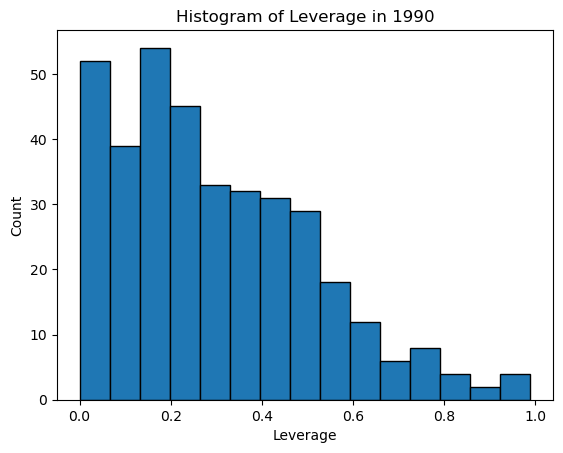

In [52]:
### Sample questions
num_comp = data.gvkey.nunique()
print("NUmber of unique companies: ", num_comp)
avg = round(data.groupby('gvkey').size().mean(), 4)
print("Number of observation on average per company: ", avg)

lev_1990 = data[data.year == 1990].leverage
plt.figure()
plt.hist(lev_1990, edgecolor='black', bins=15)
plt.title("Histogram of Leverage in 1990")
plt.xlabel("Leverage")
plt.ylabel("Count")
plt.show()



In [57]:
### Regression estimates, interpretation, and standard errors. Report R-squared.
#Remove infinite oiadp and capxv along NAN values to ensure our SVD converges
data['log_capxv'] = np.log(data['capxv'])
data['log_oiadp'] = np.log(data['oiadp'])
data = data.dropna(subset=['log_capxv', 'log_oiadp'], how='any')
data = data[~data['log_capxv'].isin([np.inf, -np.inf])]
data = data[~data['log_oiadp'].isin([np.inf, -np.inf])]

# No controls
m1 = smf.ols(formula='leverage ~ log_capxv + log_oiadp', data=data)
print(m1.fit(cov_type='HC3').summary())

# Control variables: Year fixed effects
m2 = smf.ols(formula='leverage ~ log_capxv + log_oiadp + C(year)', data=data)
print(m2.fit(cov_type='HC3').summary())

# Control variables: Company fixed effects
m3 = smf.ols(formula='leverage ~ log_capxv + log_oiadp + C(gvkey)', data=data)
print(m3.fit(cov_type='HC3').summary())

# Control variables: Company and Year fixed effects
m4 = smf.ols(formula='leverage ~ log_capxv + log_oiadp + C(year) + C(gvkey)', data=data)
print(m4.fit(cov_type='HC3').summary())

                                    ##################Report##################
# """
# y~log(xi) means that for every A% increase in xi, then y increases by bet_hat_i * (ln(1+A/100))
# accroding to lecture therefore we can interpret the log betas more generally as follows. The
# R-squared of x suggests the model explains about 100 * x percent of the variation in y. See
# them printed below for each model.

# model 1:
# - As Beta 1 is postive and statistically significant, it suggests that companies with higher capital 
# expenditures tend to have higher leverage ratios, as percent increases in capxv leads to increases in
# leverage.

# - As Beta 2 is negative and statistically significant, it suggests that companies with higher capital 
# expenditures tend to have lower leverage ratios as percent increases in oiadp leads to decreases in
# leverage.

# - Both have very low std error meaning that our beta estimations are precise in measuring the impact
# of capxv and oiadp on leverage.

# model 2:
# - The values of beta 1 and beta 2 are similar to the first model therefore having a similar relationship
# with company leverage ratio. Here again they are significant with low p values and standard errors.

# model 3:
# - The values of beta 1 and beta 2 are similar to the first model with a slightly lower beta 1
# and slightly higher beta 2 therefore having a similar relationship with company leverage ratio. 
# Here again they are significant with low p values and standard errors.

# model 4:
# - The values of beta 1 and beta 2 are similar to the first model with a slightly lower beta 1
# and slightly higher beta 2 therefore having a similar relationship with company leverage ratio. 
# Here again they are significant with low p values and standard errors.

# Model 3 and 4 have the highest r-squared values of 0.7 implying those models best
# estimate our company leverage. They do way better than the first two models 
# which both have r squared values less than or equal 0.08.
# """



                            OLS Regression Results                            
Dep. Variable:               leverage   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     262.9
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          2.50e-111
Time:                        22:00:01   Log-Likelihood:                 1370.3
No. Observations:                8053   AIC:                            -2735.
Df Residuals:                    8050   BIC:                            -2714.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2535      0.008     31.664      0.0

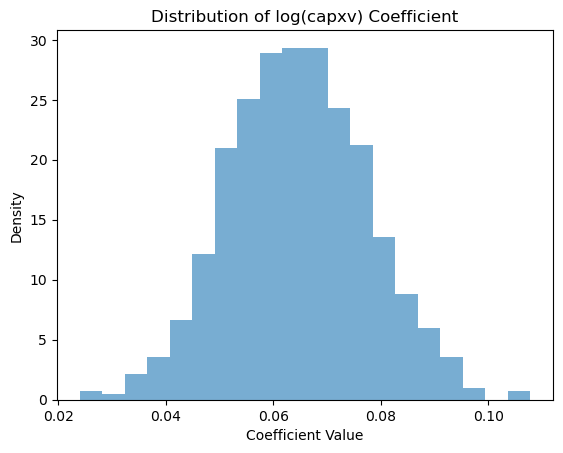

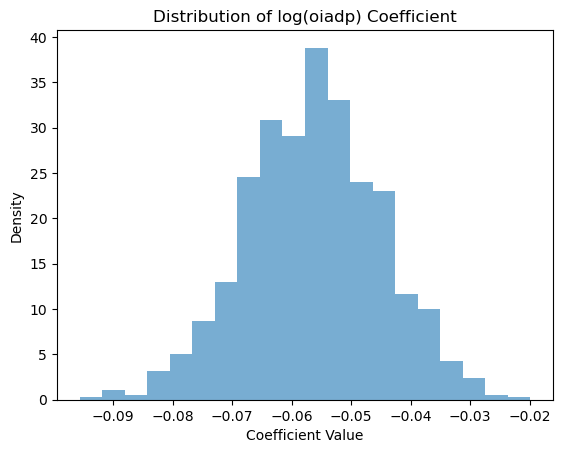

standard deviations of log(capxv) betas:  0.01287838441399168
standard deviations of log(oiadp) betas:  0.011333872712263634


In [60]:
## 1000 Random samples and 1000 regression results (100 companies in each sample). Plot distribution of each beta coefficient.
## Compare standard deviation of each distribution to standard error of regression (4) from the previous part.
capxv_betas = []
oiadp_betas = []

for _ in range(1000):
    companies = np.random.choice(data.gvkey.unique(), 100, replace=False)
    comp_data = data[data.gvkey.isin(companies)]
    m5 = smf.ols(formula='leverage ~ np.log(capxv) + np.log(oiadp)', data=comp_data).fit(cov_type='HC3')
    capxv_betas.append(m5.params['np.log(capxv)'])
    oiadp_betas.append(m5.params['np.log(oiadp)'])

plt.figure()
plt.hist(capxv_betas, bins=20, density=True, alpha=0.6)
plt.title('Distribution of log(capxv) Coefficient')
plt.xlabel('Coefficient Value')
plt.ylabel('Density')

plt.figure()
plt.hist(oiadp_betas, bins=20, density=True, alpha=0.6)
plt.title('Distribution of log(oiadp) Coefficient')
plt.xlabel('Coefficient Value')
plt.ylabel('Density')

plt.show()

print("standard deviations of log(capxv) betas: ", np.std(capxv_betas))
print("standard deviations of log(oiadp) betas: ", np.std(oiadp_betas))


In [ ]:
# Their std is much bigger almost four times the values from part 5 no control.